# Classer les Iris (KNN)

Une chaine de fleuriste aimerait pouvoir trier ses différentes espèces d'iris.
Réalisez un programme permettant de prédire l'espèce d'une iris à partir de la largeur et longueur de ses sépales et des pétales.

In [107]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Il n'y a pas de valeur null dans le dataframe.

In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## EDA

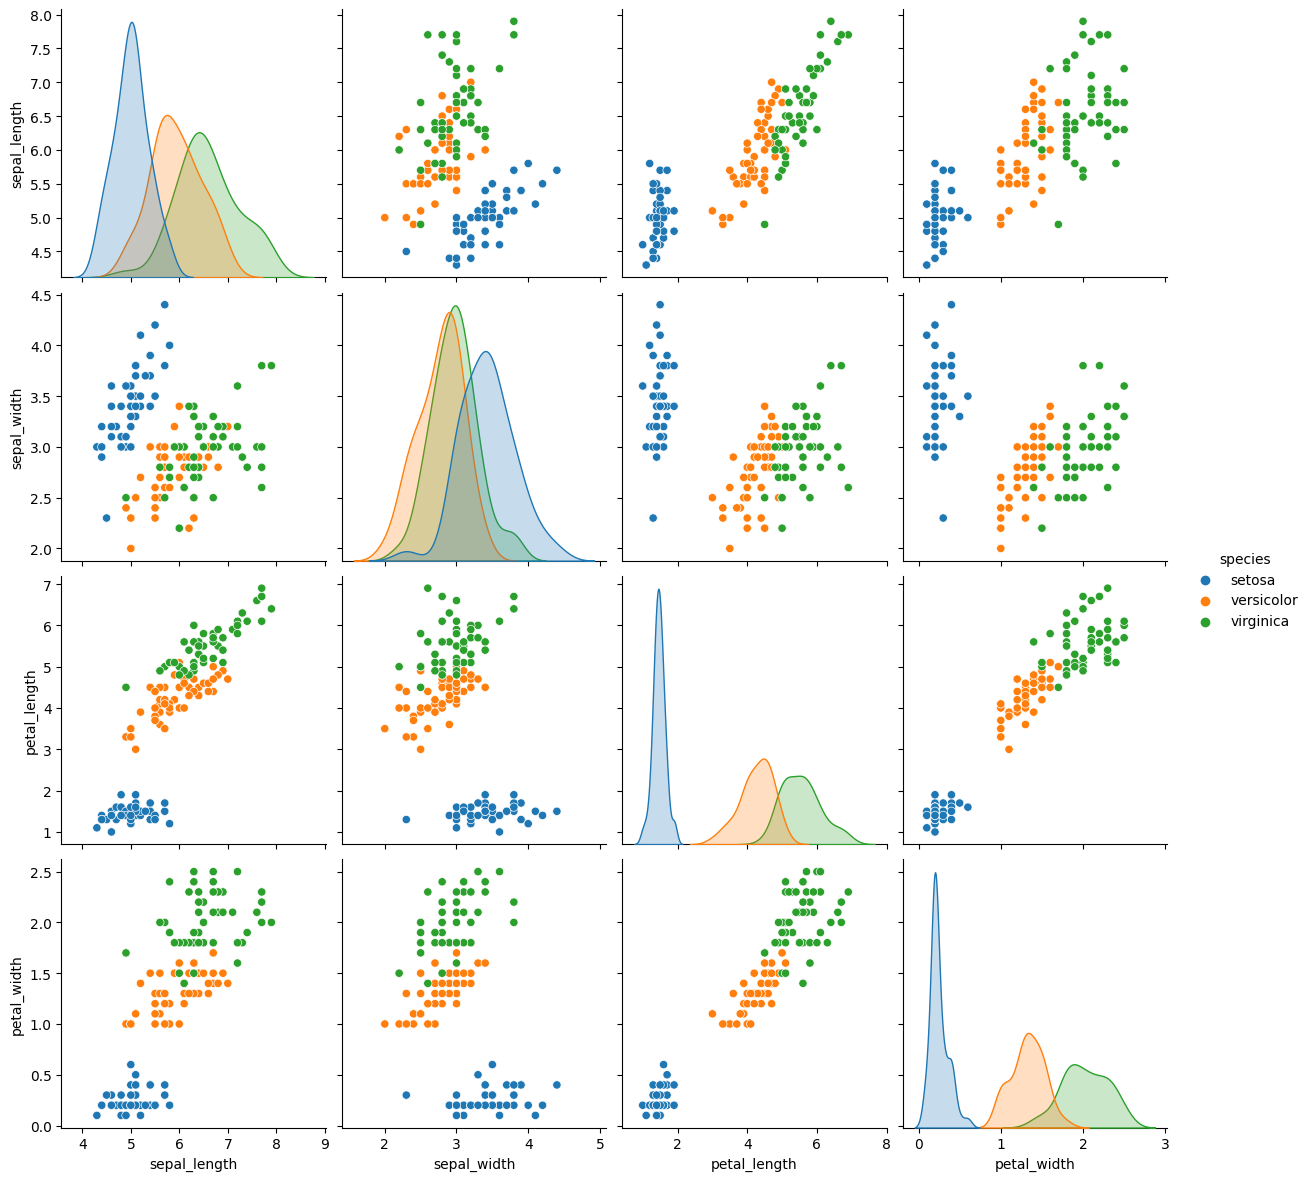

In [5]:
sns.pairplot(data=data, hue='species', height=3)

Il apparait que l'association de deux caractères peut permettre de distinguer deux espèces d'iris, l'association de la largeur et de la longueur des pétales semblent être le choix le plus pertinent.

array([[<AxesSubplot: title={'center': 'sepal_length'}>,
        <AxesSubplot: title={'center': 'sepal_width'}>],
       [<AxesSubplot: title={'center': 'petal_length'}>,
        <AxesSubplot: title={'center': 'petal_width'}>]], dtype=object)

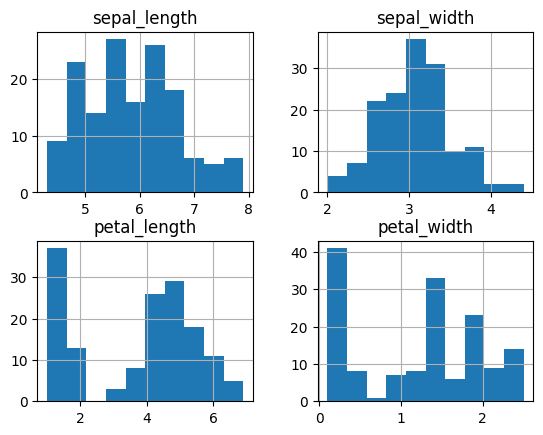

In [46]:
data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].hist()

Il n'y pas de valeurs abérrantes dans les quatres caractères étudiés. On peut remarquer que les deux mesures du pétales présentent une 'cassure' dans la répartition des mesures. Cela pourrait indiquer qu'une espèce se distingue plus des deux autres.

Text(0.5, 1.0, 'Largeur moyenne des pétales par espèces')

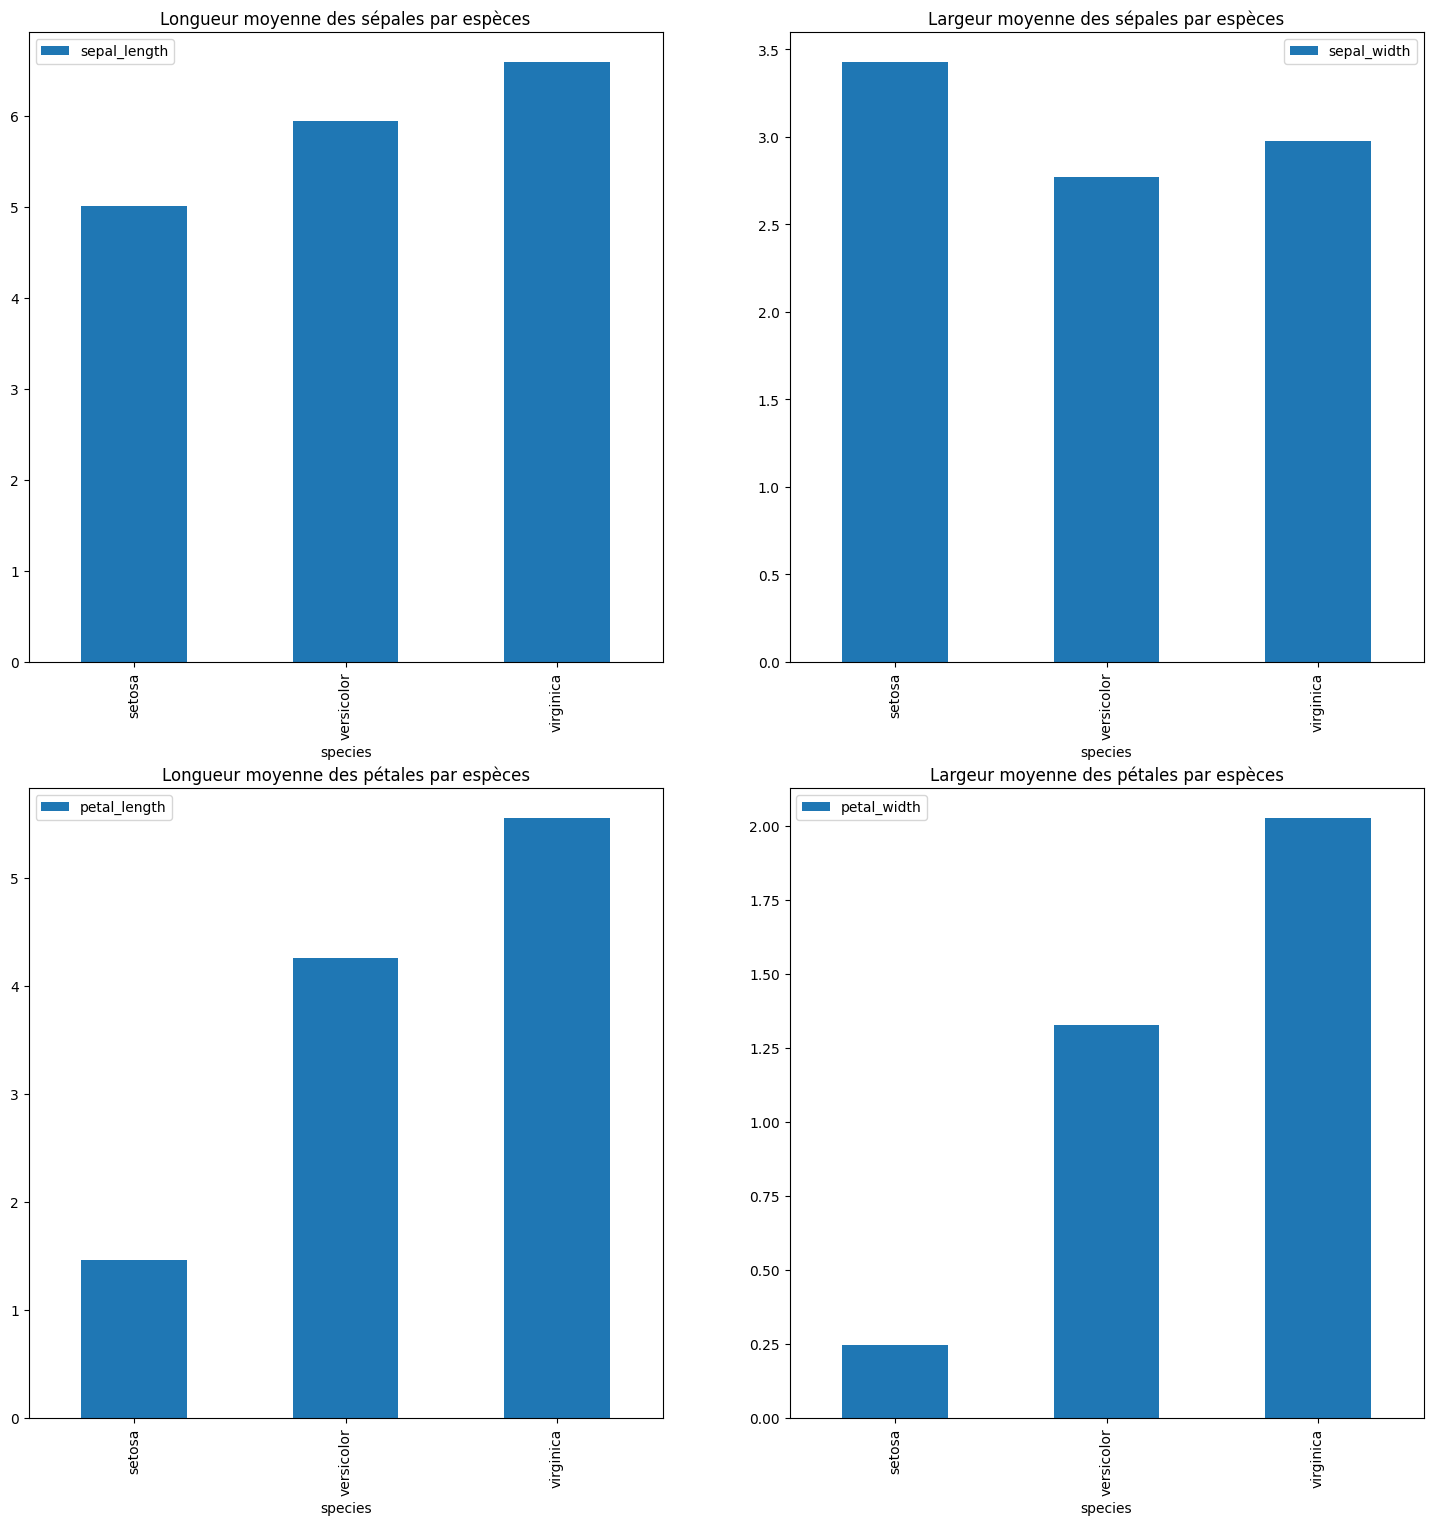

In [47]:
f, ax = plt.subplots(2, 2, figsize=(18, 18))
data[['species', 'sepal_length']].groupby(['species']).mean().plot.bar(ax=ax[0, 0])
ax[0,0].set_title('Longueur moyenne des sépales par espèces')
data[['species', 'sepal_width']].groupby(['species']).mean().plot.bar(ax=ax[0, 1])
ax[0,1].set_title('Largeur moyenne des sépales par espèces')
data[['species', 'petal_length']].groupby(['species']).mean().plot.bar(ax=ax[1, 0])
ax[1,0].set_title('Longueur moyenne des pétales par espèces')
data[['species', 'petal_width']].groupby(['species']).mean().plot.bar(ax=ax[1, 1])
ax[1,1].set_title('Largeur moyenne des pétales par espèces')

Cela semble se confirmer ! Les pétales apparaissent être un caractère bien plus distinctif entre les trois espèces que les sépales, tout particulièrement pour Setosa. Tandis que les sépales, les mesures sont assez proche.

Text(0.5, 1.0, 'Largeur des pétales par espèce')

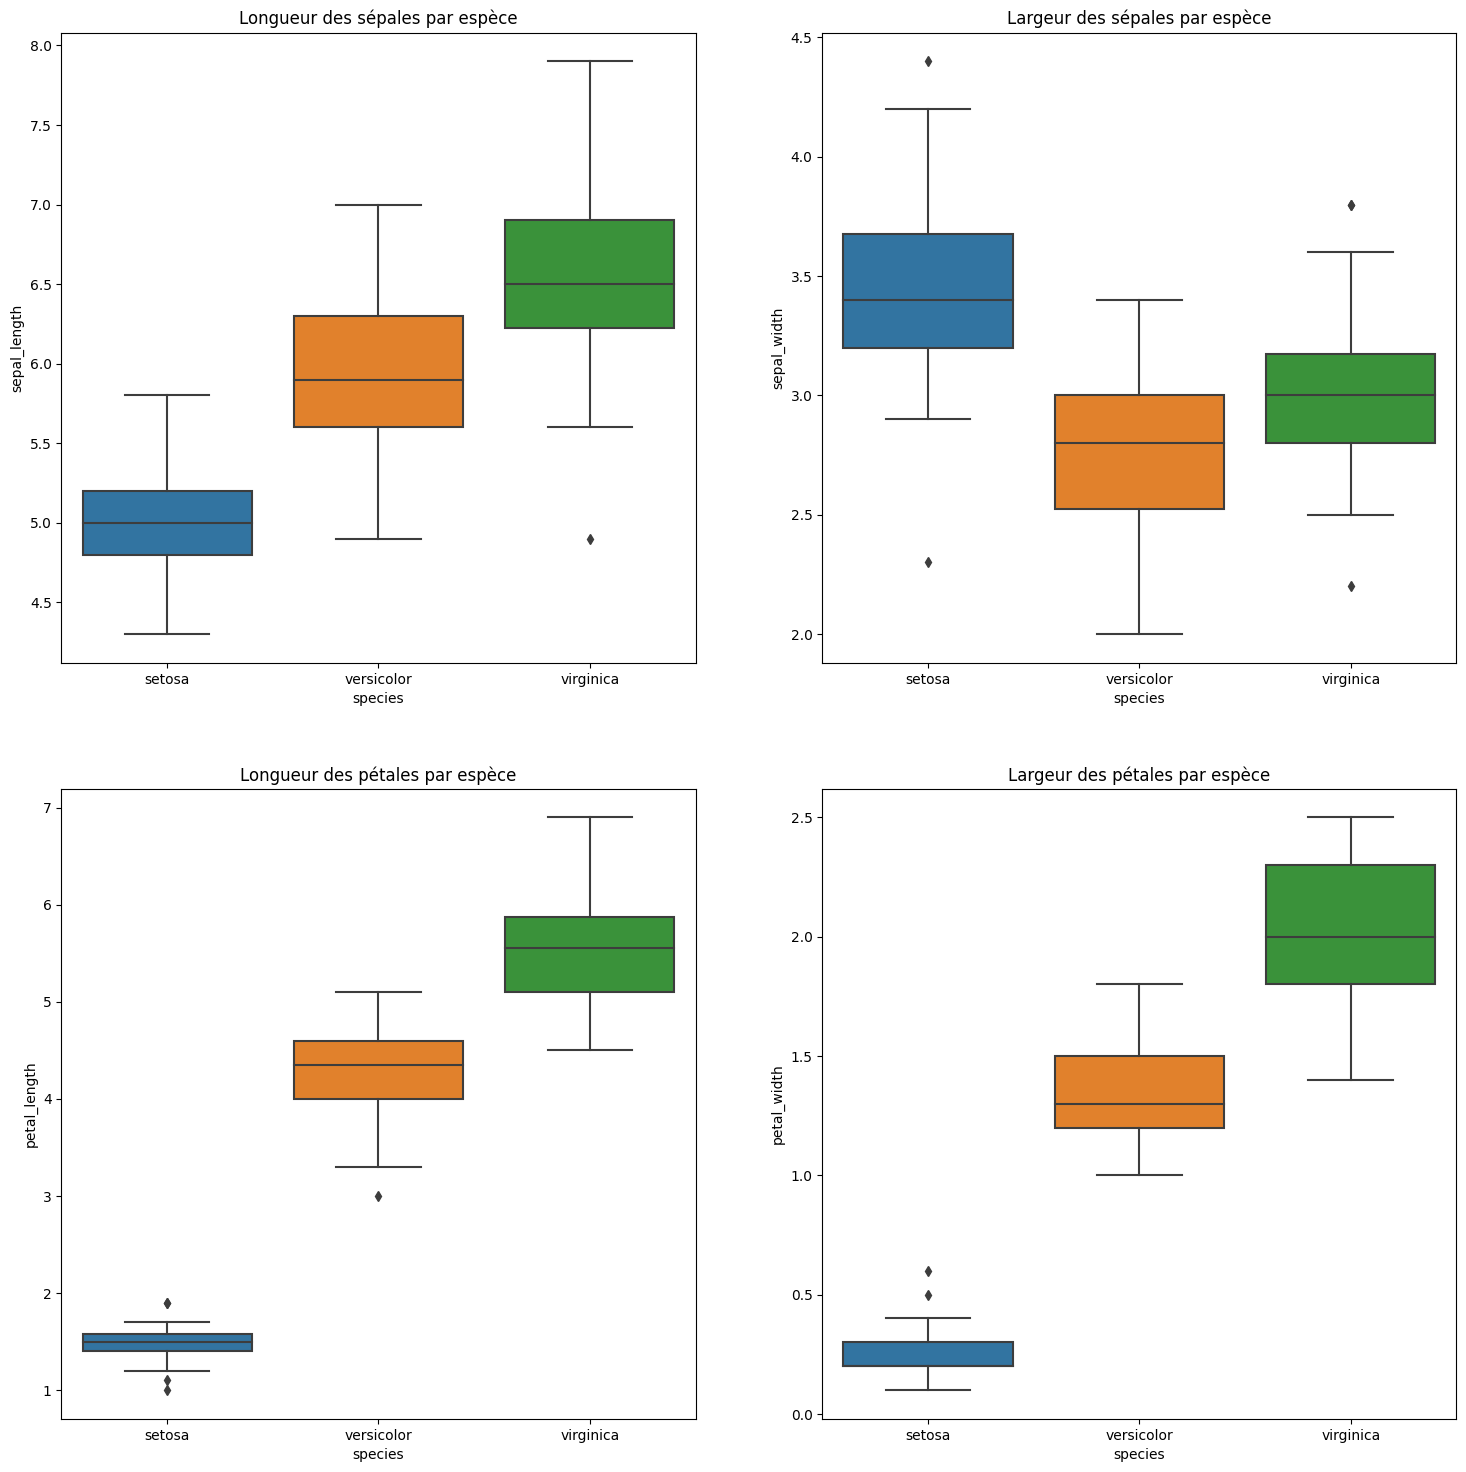

In [48]:
f, ax = plt.subplots(2, 2, figsize=(18, 18))
sns.boxplot(x='species',y='sepal_length', data=data, ax= ax[0,0])
ax[0, 0].set_title('Longueur des sépales par espèce')
sns.boxplot(x='species',y='sepal_width', data=data, ax= ax[0,1])
ax[0, 1].set_title('Largeur des sépales par espèce')
sns.boxplot(x='species',y='petal_length', data=data, ax= ax[1,0])
ax[1, 0].set_title('Longueur des pétales par espèce')
sns.boxplot(x='species',y='petal_width', data=data, ax= ax[1,1])
ax[1, 1].set_title('Largeur des pétales par espèce')

Cela confirme encore une fois que le caractère pétale permet de distinguer bien mieux les espèces que les sépales.

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4260\531360682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


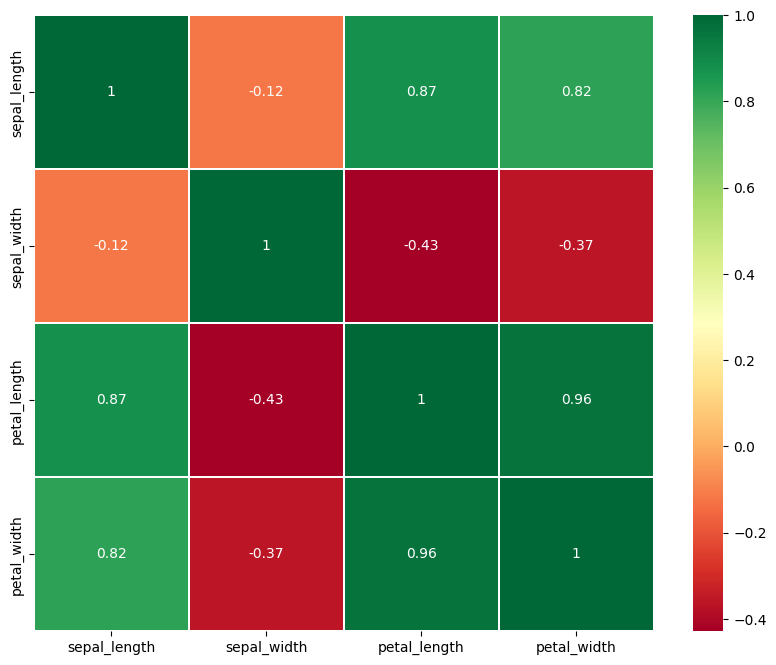

In [49]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)

## ML

In [109]:
y = data['species']
X = data.drop(['species', 'sepal_length', 'sepal_width'], axis=1)

### Séparation du train set et du test set

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [112]:
print(X_train.shape, X_test.shape)

(120, 2) (30, 2)


### Encodage et normalisation

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Recherche des meilleurs hyper-paramètres

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold

In [119]:
model = KNeighborsClassifier(n_neighbors=1)

In [120]:
cv = StratifiedKFold()
cross_val_score(model, X_train, y_train, cv= cv).mean()

0.9583333333333334

In [121]:
from sklearn.model_selection import validation_curve

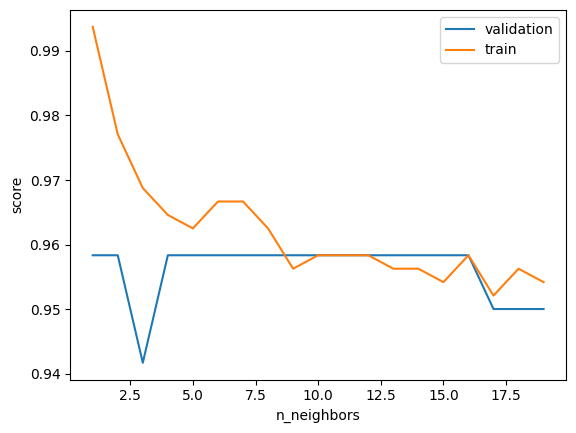

In [122]:
k = np.arange(1, 20)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors',
                                            param_range= k, cv=cv)
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label="train")

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [123]:
param_grid= {'n_neighbors': np.arange(1, 20),
'metric':['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = cv)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [124]:
grid.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [125]:
grid.best_params_
model = grid.best_estimator_
model.score(X_test, y_test)

0.9666666666666667

### Matrice de confusion

<AxesSubplot: >

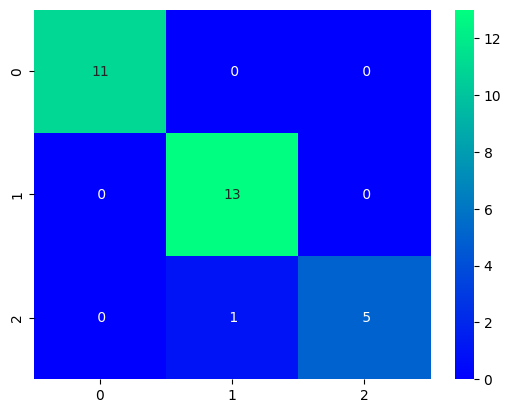

In [126]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), cmap='winter', annot=True, fmt='2.0f')

### Accuracy

In [127]:
from sklearn.metrics import accuracy_score

In [128]:
accuracy = accuracy_score(y_test, model.predict(X_test))
print(accuracy)

0.9666666666666667


In [129]:
print(f'''Les valeurs min et max pour la longueur des pétales est {data.petal_length.min()} et {data.petal_length.max()}''')
print(f'''Les valeurs min et max pour la largeur des pétales est {data.petal_width.min()} et {data.petal_width.max()}''')


Les valeurs min et max pour la longueur des pétales est 1.0 et 6.9
Les valeurs min et max pour la largeur des pétales est 0.1 et 2.5


In [130]:

def iris_response(model, petal_length, petal_width):
    x = np.array([float(petal_length), float(petal_width)]).reshape(1, 2)
    x = pd.DataFrame(x, columns=['petal_length', 'petal_width'])

    x = scaler.transform(x)
    
    print(encoder.inverse_transform(model.predict(x))[0])
    print(model.predict_proba(x))

In [131]:
iris_response(model, 2, 1)

versicolor
[[0. 1. 0.]]


### Learning Curve

In [132]:
from sklearn.model_selection import learning_curve

[ 9 19 28 38 48 57 67 76 86 96]


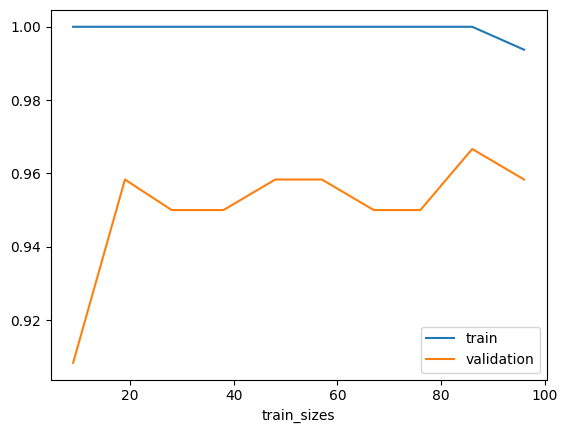

In [133]:
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                            train_sizes= np.linspace(0.1, 1.0, 10), cv=cv)
print(N)
plt.plot(N, train_score.mean(axis = 1),label='train')
plt.plot(N, val_score.mean(axis= 1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [31]:
import joblib

In [32]:
model_complet={"encoder": encoder,
                "scaler": scaler,
                "model_iris": model}
joblib.dump(model_complet, 'ml_iris.joblib')

['ml_iris.joblib']